## Lectura de Datos

In [1]:
import pandas as pd
credit = pd.read_csv("./data/credit.csv")
credit

,Unnamed: 0,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc
0,1,buen,no,18.0,pre buen pagador,privado,1049.0,mujer,vive solo
1,2,buen,no,9.0,pre buen pagador,profesional,2799.0,hombre,no vive solo
2,3,buen,bad running,12.0,pre buen pagador,profesional,841.0,mujer,vive solo
3,4,buen,no,12.0,pre buen pagador,profesional,2122.0,hombre,no vive solo
4,5,buen,no,12.0,pre buen pagador,profesional,2171.0,hombre,no vive solo
...,...,...,...,...,...,...,...,...,...
995,996,mal,no,24.0,pre buen pagador,privado,1987.0,hombre,no vive solo
996,997,mal,no,24.0,pre buen pagador,profesional,2303.0,hombre,no vive solo
997,998,mal,good running,21.0,pre buen pagador,profesional,12680.0,hombre,no vive solo
998,999,mal,bad running,12.0,pre buen pagador,privado,6468.0,hombre,no vive solo


In [2]:
print(credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Y           1000 non-null   object 
 2   Cuenta      1000 non-null   object 
 3   Mes         1000 non-null   float64
 4   Ppag        1000 non-null   object 
 5   Uso         1000 non-null   object 
 6   DM          1000 non-null   float64
 7   Sexo        1000 non-null   object 
 8   Estc        1000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB
None


In [3]:
print(credit['Y'].value_counts())

Y
buen    700
mal     300
Name: count, dtype: int64


In [4]:
credit = pd.get_dummies(credit, columns=['Y', 'Cuenta', 'Ppag', 'Uso', 'Sexo', 'Estc'])
credit

,Unnamed: 0,Mes,DM,Y_buen,Y_mal,Cuenta_bad running,Cuenta_good running,Cuenta_no,Ppag_pre buen pagador,Ppag_pre mal pagador,Uso_privado,Uso_profesional,Sexo_hombre,Sexo_mujer,Estc_no vive solo,Estc_vive solo
0,1,18.0,1049.0,True,False,False,False,True,True,False,True,False,False,True,False,True
1,2,9.0,2799.0,True,False,False,False,True,True,False,False,True,True,False,True,False
2,3,12.0,841.0,True,False,True,False,False,True,False,False,True,False,True,False,True
3,4,12.0,2122.0,True,False,False,False,True,True,False,False,True,True,False,True,False
4,5,12.0,2171.0,True,False,False,False,True,True,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,24.0,1987.0,False,True,False,False,True,True,False,True,False,True,False,True,False
996,997,24.0,2303.0,False,True,False,False,True,True,False,False,True,True,False,True,False
997,998,21.0,12680.0,False,True,False,True,False,True,False,False,True,True,False,True,False
998,999,12.0,6468.0,False,True,True,False,False,True,False,True,False,True,False,True,False


In [23]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   Mes                    1000 non-null   float64
 2   DM                     1000 non-null   float64
 3   Y_buen                 1000 non-null   bool   
 4   Y_mal                  1000 non-null   bool   
 5   Cuenta_bad running     1000 non-null   bool   
 6   Cuenta_good running    1000 non-null   bool   
 7   Cuenta_no              1000 non-null   bool   
 8   Ppag_pre buen pagador  1000 non-null   bool   
 9   Ppag_pre mal pagador   1000 non-null   bool   
 10  Uso_privado            1000 non-null   bool   
 11  Uso_profesional        1000 non-null   bool   
 12  Sexo_hombre            1000 non-null   bool   
 13  Sexo_mujer             1000 non-null   bool   
 14  Estc_no vive solo      1000 non-null   bool   
 15  Estc_

## Partición de la Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
seed = 123
train, test = train_test_split(credit, test_size=0.25, random_state=seed)

## Modelo de Regresión Logística Binaria

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
X_train = train.drop(columns=['Y_buen', 'Y_mal'])
y_train = train['Y_buen']

X_test = test.drop(columns=['Y_buen', 'Y_mal'])
y_test = test['Y_buen']

model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)

LogisticRegression(random_state=123)

## Evaluación del Modelo

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [10]:
# Estimación de la probabilidad
test_prob = model.predict_proba(X_test)[:, 1]

# Predicción del modelo
test_pred = (test_prob > 0.5).astype(int)

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

[[ 72  13]
 [  9 156]]


In [11]:
# Tasa de acierto, tasa de error
accuracy = accuracy_score(y_test, test_pred)
error_rate = 1 - accuracy
print(f'Tasa de acierto: {accuracy}, \nTasa de error: {error_rate}')

Tasa de acierto: 0.912, 
Tasa de error: 0.08799999999999997


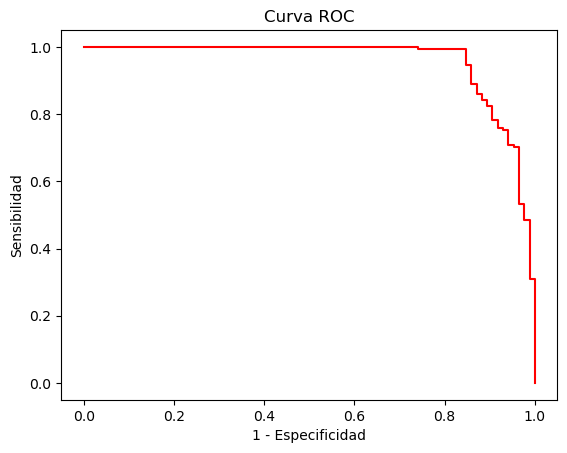

In [12]:
# AUC y Curva ROC
auc = roc_auc_score(y_test, test_prob)
fpr, tpr, _ = roc_curve(y_test, test_prob)

plt.plot(1 - fpr, tpr, color='red')
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.show()

In [13]:
# Punto de corte óptimo
optimal_threshold = max(tpr - fpr)
print(f'Punto de corte óptimo: {optimal_threshold}')

Punto de corte óptimo: 0.8409982174688057


In [14]:
# Predicción con el punto de corte óptimo
test_pred_optimal = (test_prob >= optimal_threshold).astype(int)

# Matriz de Confusión con punto de corte óptimo
conf_matrix_optimal = confusion_matrix(y_test, test_pred_optimal)
print(conf_matrix_optimal)

[[ 77   8]
 [ 36 129]]


In [15]:
import scikitplot as skplt
from scipy.stats import ks_2samp

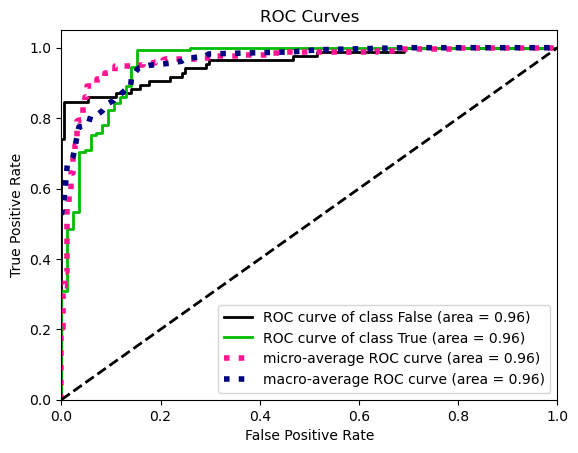

In [16]:
# Plot ROC
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
plt.show()

In [17]:
# AUC
print(f'AUC: {roc_auc_score(y_test, test_prob)}')

AUC: 0.9569340463458111


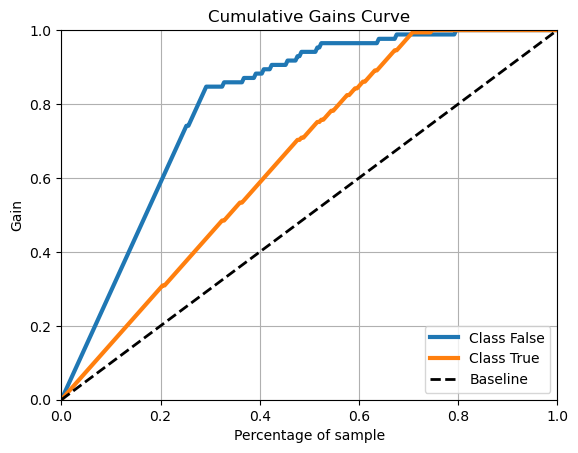

In [18]:
# Optimal cutoff
optimal_cutoff = skplt.metrics.plot_cumulative_gain(y_test, model.predict_proba(X_test))
plt.show()

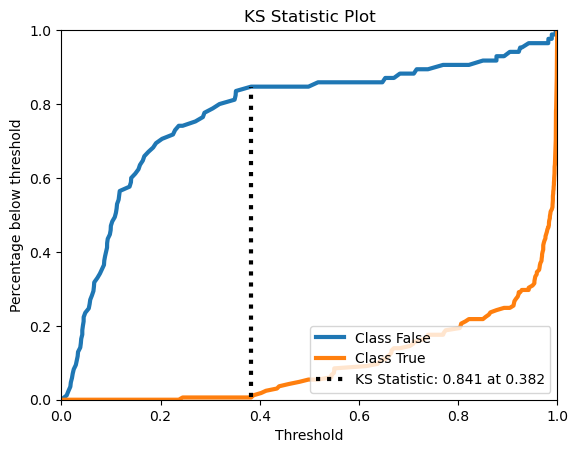

In [19]:
# KS Plot
skplt.metrics.plot_ks_statistic(y_test, model.predict_proba(X_test))
plt.show()

In [20]:
# KS Statistic
ks_statistic, _ = ks_2samp(y_test, test_prob)
#ks_statistic = skplt.metrics.ks_statistic(y_test, model.predict_proba(X_test))
print(f'KS Statistic: {ks_statistic}')

KS Statistic: 0.66


In [21]:
# Estadísticas adicionales (KS, Gini)
ks_statistic = max(tpr - fpr)
gini_coefficient = 2 * auc - 1

print(f'Estadística KS: {ks_statistic}')
print(f'Coeficiente Gini: {gini_coefficient}')

Estadística KS: 0.8409982174688057
Coeficiente Gini: 0.9138680926916223


In [22]:
# Datos con probabilidades y categorías predichas
test['Probabilidad'] = test_prob
test['Prediccion'] = test_pred
test

,Unnamed: 0,Mes,DM,Y_buen,Y_mal,Cuenta_bad running,Cuenta_good running,Cuenta_no,Ppag_pre buen pagador,Ppag_pre mal pagador,Uso_privado,Uso_profesional,Sexo_hombre,Sexo_mujer,Estc_no vive solo,Estc_vive solo,Probabilidad,Prediccion
131,132,18.0,2515.0,True,False,False,True,False,True,False,True,False,True,False,True,False,0.999008,1
203,204,24.0,7721.0,True,False,False,False,True,True,False,True,False,False,True,False,True,0.988620,1
50,51,12.0,640.0,True,False,False,True,False,True,False,False,True,True,False,False,True,0.999087,1
585,586,24.0,2910.0,True,False,False,False,True,True,False,True,False,True,False,True,False,0.729903,1
138,139,6.0,932.0,True,False,True,False,False,True,False,True,False,False,True,False,True,0.997493,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,654,24.0,2424.0,True,False,False,True,False,True,False,True,False,True,False,True,False,0.806052,1
11,12,30.0,6187.0,True,False,False,False,True,True,False,True,False,False,True,True,False,0.998736,1
252,253,12.0,804.0,True,False,False,True,False,True,False,True,False,True,False,True,False,0.996850,1
521,522,36.0,10974.0,False,True,False,True,False,True,False,True,False,False,True,False,True,0.904053,1
